In [3]:
from vedo import dataurl, Mesh, Sphere, show

import numpy as np
import math as mth
import os

In [6]:
# Reads the mesh data (.ply file) from a given URL location
filename = "./spider.ply"
if not os.path.isfile(filename): 
    !wget https://vedo.embl.es/examples/data/spider.ply

spider = Mesh("./spider.ply")

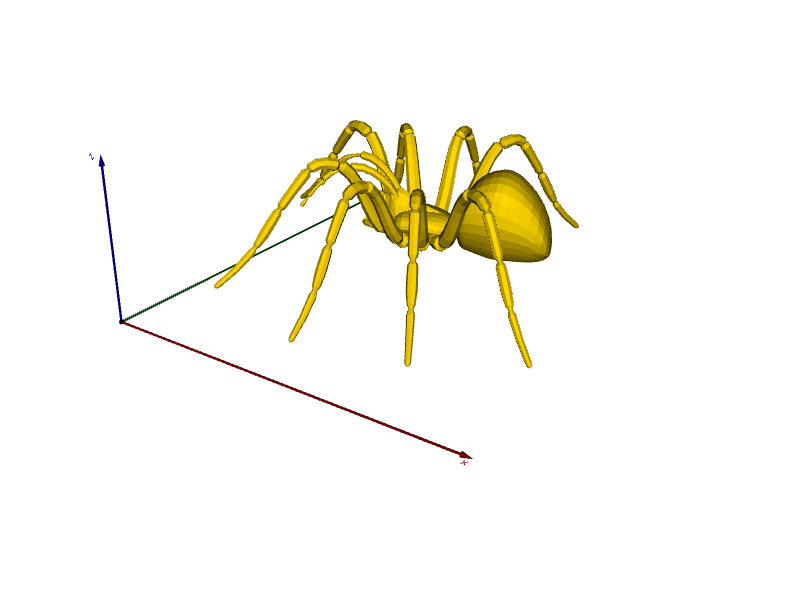

In [7]:
# Display spider with z-axis up 
show(spider, axes=2, viewup="z")#.close()

In [8]:
# Get the numpy array containing the coordinates 
# of the vertices
pts = spider.vertices

In [9]:
# Check the shape to ensure the dimensions will be correct when 
# performing matrix multiplication (transformations)
pts.shape

(4670, 3)

In [10]:
# We want a 3xN matrix so transpose matrix of points to be 3xN
pts = pts.transpose()

In [19]:
# Non Uniform Scaling transformation
S = np.array(
    [[2.0, 0.0, 0.0], 
     [0.0, 0.5, 0.0],
     [0.0, 0.0, 1.0]])
# Non Uniform Translation transformation
T = np.array(
    [[1.0, 0.0, 1.25], 
     [0.0, 1.0, 0.5],
     [0.0, 0.0, 1.0]])

In [20]:
# Apply the transformation (matrix multiplication). We could also use @
pts1 = S @ T @ pts
print(pts1)

[[7.64989978 7.58174992 7.67284995 ... 7.40080017 7.19490016 7.02724987]
 [1.42104998 1.41557503 1.413425   ... 1.87090001 1.85305005 1.84122494]
 [1.61539996 1.58109999 1.61049998 ... 1.69920003 1.65260005 1.61049998]]



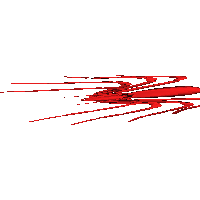

In [21]:
# Make a copy of the original shape
spider1 = spider.clone()

# Set the vertices of the new (transformed) shape
spider1.vertices = pts1.transpose()

# Change the color to red
spider1.c("red")

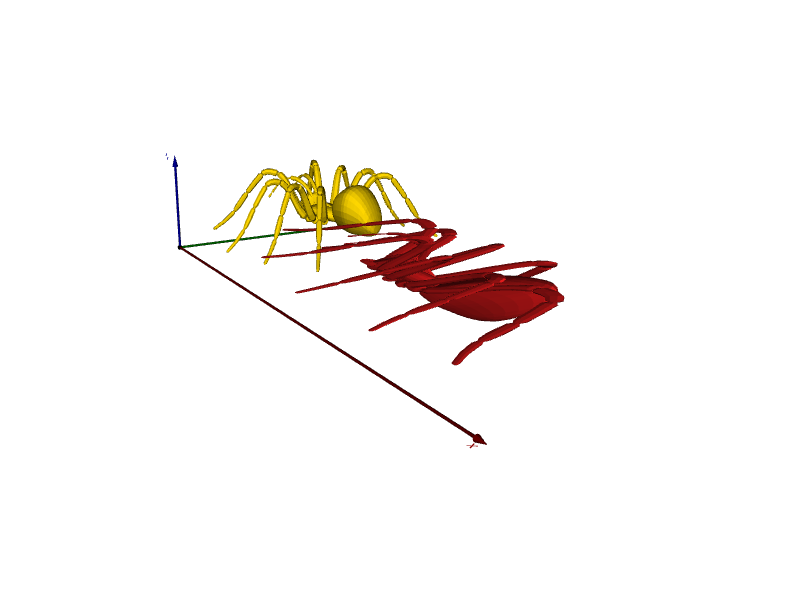

In [22]:
show(spider,spider1, axes=2, viewup="z", title="Non-uniform scaling")#.close()